# Classification - Decision Tree Primer

Classify Iris (flowers) by their sepal/petal width/length to their species: 'setosa' 'versicolor' 'virginica'
![Flower](../images/5-1-flowerpartssepal.gif)[Original Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBXkpMmJW9A6RAM90hUnz0iwyW_4FHsrPPrsNEePW7Hs_waUDJuw)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from plotting_utilities import plot_decision_tree, plot_feature_importances
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris.DESCR.split('\n')

['Iris Plants Database',
 '====================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    petal width:    0.1  2.5   1.20  0.76 

In [2]:
# IN: Features aka Predictors
print(iris.data.dtype)
print(iris.data.shape)

print(iris.feature_names)
iris.data[:5,:]

float64
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [3]:
# OUT: Target, here: species
print(iris.target.dtype)
print(iris.target.shape)

print(iris.target_names)
iris.target[:5]

int64
(150,)
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0])

# Task: Create a Decision Tree
to be able to classify an unseen Iris by sepal/petal with into its species: 'setosa' 'versicolor' 'virginica'

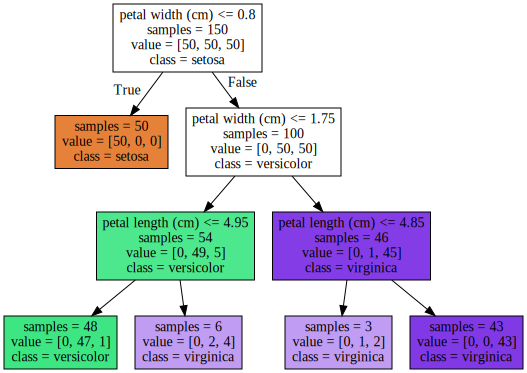

In [4]:
X = iris.data
y = iris.target

# TODO: Try with and without max_depth (setting also avoids overfitting)
# clf = DecisionTreeClassifier().fit(X, y)
clf = DecisionTreeClassifier(max_depth = 3).fit(X, y)
plot_decision_tree(clf, iris.feature_names, iris.target_names)

# Wait, how do I know that the Decision Tree works???

A: Split your data into test and train and evaluate with the test data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)

# Train the classifier only with the trainings data
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [6]:
# predict for the test data and compare with the actual outcome
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

print(" ------ Predicted ")
print(" Actual ")
confusion_matrix(y_test, y_pred)

 ------ Predicted 
 Actual 


array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]])

In [7]:
print('Accuracy of Decision Tree classifier on test set == sum(TP)/sum(): {}'.format((15+11+11)/(15+11+11+1)))
print('Accuracy of Decision Tree classifier on test set with "score"-function: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set == sum(TP)/sum(): 0.9736842105263158
Accuracy of Decision Tree classifier on test set with "score"-function: 0.97


## Feature importance
TODO: Compare with level in Tree

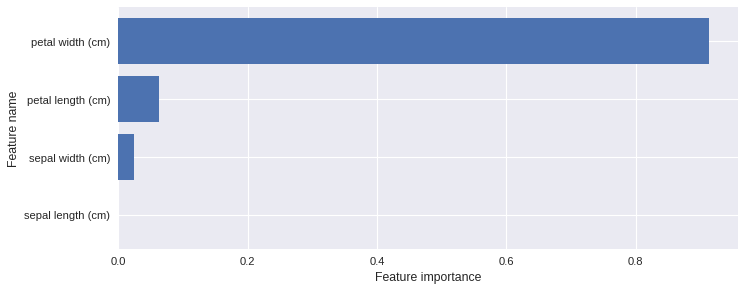

Feature names      : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importances: [ 0.          0.02457904  0.06251049  0.91291047]


In [8]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature names      : {}'.format(iris.feature_names))
print('Feature importances: {}'.format(clf.feature_importances_))